In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
carData = pd.read_csv("car_data.csv")
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# We Know that there isn't any missing value cause all coloumns have 205 non Null values

In [7]:
def splitter(x):
    res  = x.split()
    return res[0]

carData["CompanyName"] = carData["CarName"].apply(splitter)
carData["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
carData["CompanyName"].replace('toyouta','toyota', inplace = True)
carData["CompanyName"].replace('porcshce','porsche', inplace = True)
carData["CompanyName"].replace('maxda','mazda', inplace = True)
carData["CompanyName"].replace('vokswagen','volkswagen', inplace = True)
carData["CompanyName"].replace('vw','volkswagen', inplace = True)
carData["CompanyName"].replace("Nissan","nissan", inplace = True)
carData["CompanyName"].unique()






array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

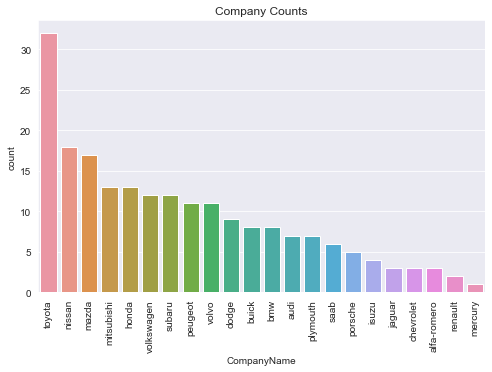

In [9]:
sns.countplot(x=carData["CompanyName"],
             order = carData["CompanyName"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Company Counts")
plt.show()

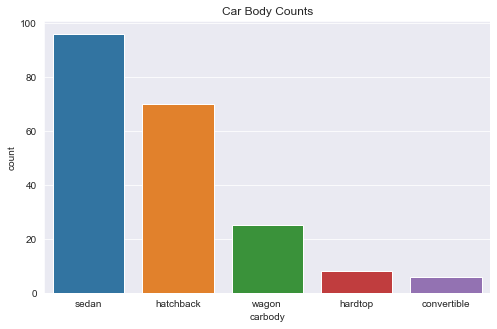

In [10]:
sns.countplot(x=carData["carbody"],
             order = carData["carbody"].value_counts().index)
plt.title("Car Body Counts")
plt.show()

In [11]:
# we can conclude the general preference of our data set. For example in this case toyota dominates other companys,  
# and sedan and hatchback make up for more than 50 % of our car body types

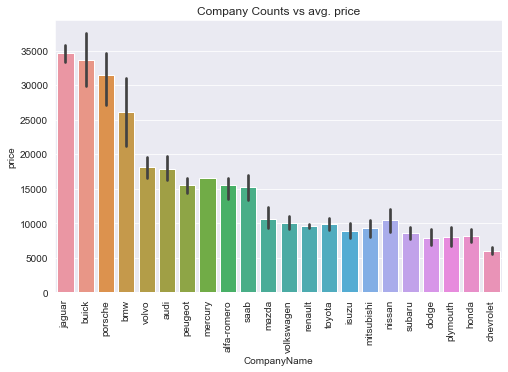

In [12]:
result = carData.groupby(["CompanyName"])['price'].median().reset_index().sort_values('price',ascending=False)
sns.barplot(x="CompanyName", y="price", data= carData,ci=90, order=result["CompanyName"])
plt.xticks(rotation=90)
plt.title("Company Counts vs avg. price")
plt.show()

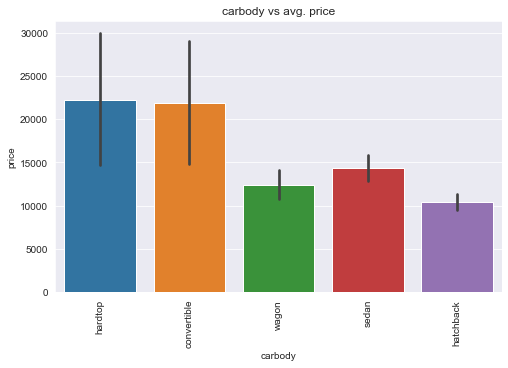

In [13]:
result = carData.groupby(["carbody"])['price'].median().reset_index().sort_values('price',ascending=False)
sns.barplot(x="carbody", y="price", data= carData,ci=90, order=result["carbody"])
plt.xticks(rotation=90)
plt.title("carbody vs avg. price")
plt.show()

In [14]:
# We can see The visualization of the what comapny and carbody cost. We also got a C.I which helps us helps us
# estimate the error through the black bar

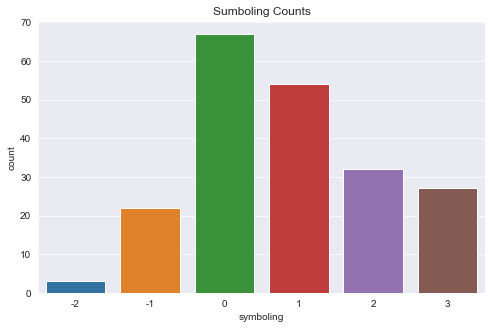

In [15]:
sns.countplot(x="symboling", data = carData )
plt.title("Sumboling Counts")
plt.show()

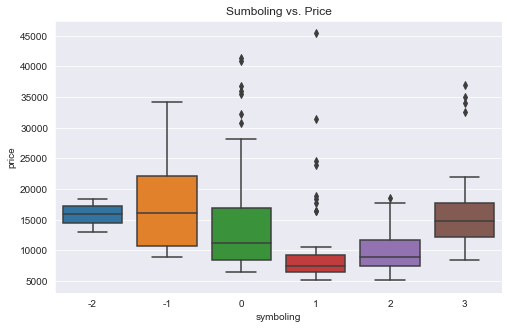

In [16]:
sns.boxplot(x="symboling", y = "price", data = carData )
plt.title("Sumboling vs. Price")
plt.show()

In [17]:
# similar to before we get a rough count on the symboling and thebox plots helps us find the (medain,IQR,outliers,min,max)
# for each unique symboling which gives us insighht on how we should deal with the outliers.

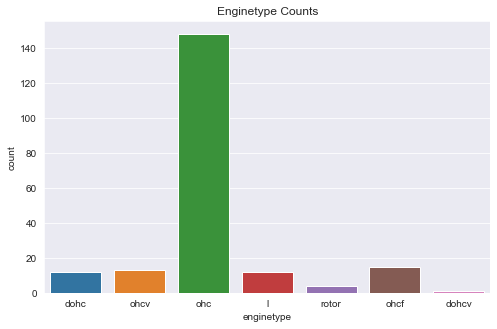

In [18]:
sns.countplot(x="enginetype", data = carData )
plt.title("Enginetype Counts")
plt.show()

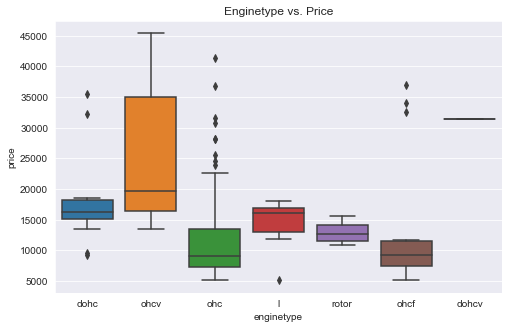

In [19]:
sns.boxplot(x="enginetype", y = "price", data = carData )
plt.title("Enginetype vs. Price")
plt.show()

In [20]:
# This shows chc engiine type dominates the engintype but has alot of outliers

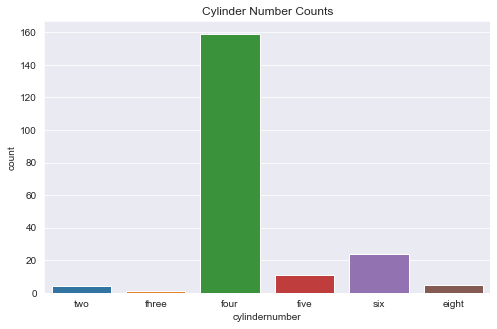

In [21]:
sns.countplot(x="cylindernumber", order = ["two","three","four","five","six","eight"], data = carData )
plt.title("Cylinder Number Counts")
plt.show()

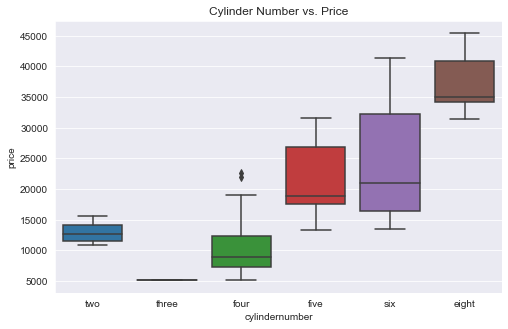

In [22]:
sns.boxplot(x="cylindernumber", y = "price", order = ["two","three","four","five","six","eight"],data = carData )
plt.title("Cylinder Number vs. Price")
plt.show()

In [23]:
# four cylinders are the most common cylinder number and are suprissing cheap

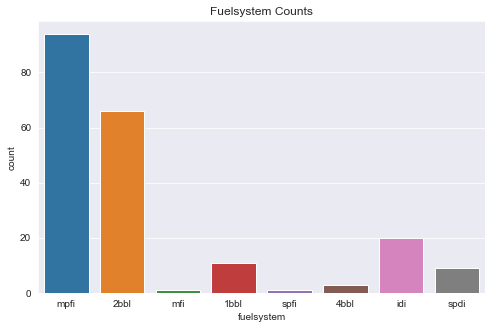

In [24]:
sns.countplot(x="fuelsystem", data = carData )
plt.title("Fuelsystem Counts")
plt.show()

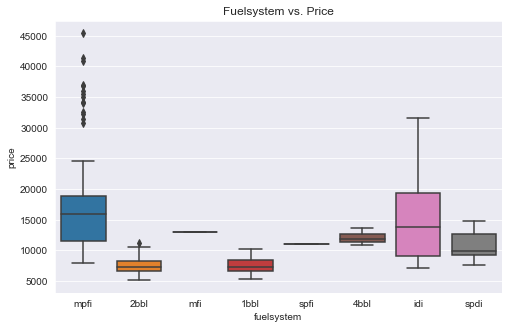

In [25]:
sns.boxplot(x="fuelsystem", y = "price", data = carData )
plt.title("Fuelsystem vs. Price")
plt.show()

In [26]:
# mpfi and 2bbl make up for more than 50 % of the data set but the mpfi can have some exagerated price so 2bbl 
# is the better fuel system


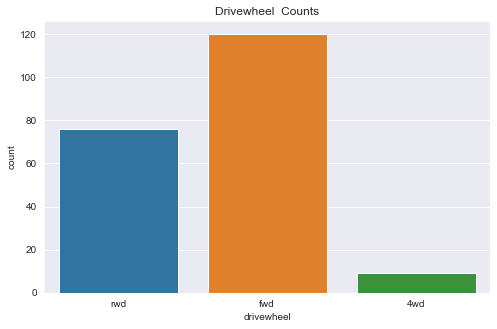

In [27]:
sns.countplot(x="drivewheel", data = carData )
plt.title("Drivewheel  Counts")
plt.show()

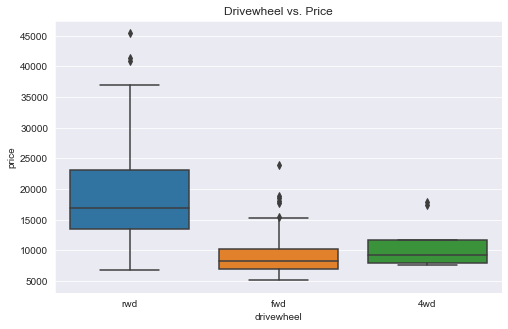

In [28]:
sns.boxplot(x="drivewheel", y = "price", data = carData )
plt.title("Drivewheel vs. Price")
plt.show()

In [29]:
# 4wd driverwheel are not well represented in this data and they are usually on the cheaper side

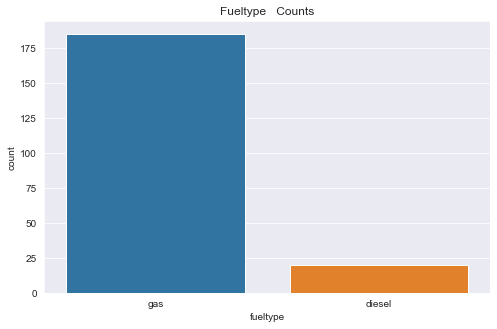

In [30]:
sns.countplot(x="fueltype", data = carData )
plt.title("Fueltype   Counts")
plt.show()

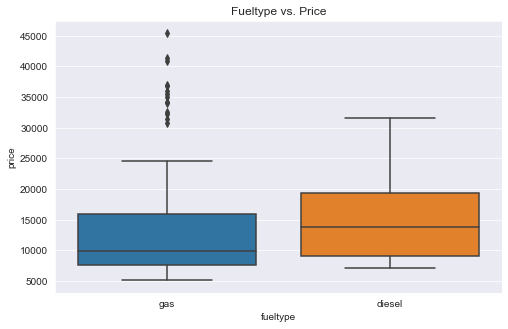

In [31]:
sns.boxplot(x="fueltype", y = "price", data = carData )
plt.title("Fueltype vs. Price")
plt.show()

In [32]:
# desel running cars are rare and on average on the more expensive side 

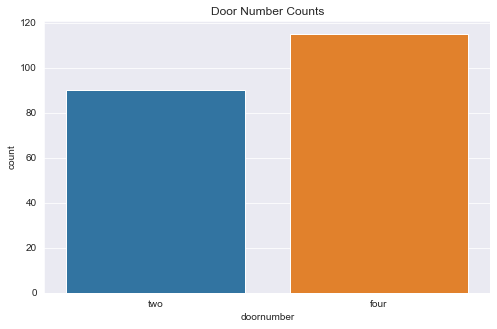

In [33]:
sns.countplot(x="doornumber", data = carData )
plt.title("Door Number Counts")
plt.show()

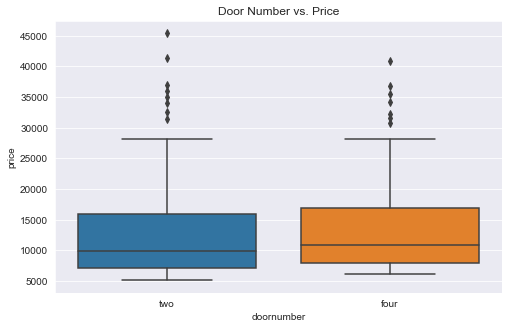

In [34]:
sns.boxplot(x="doornumber", y = "price", data = carData )
plt.title("Door Number vs. Price")
plt.show()

In [35]:
# the number looks really simialar and it gives us insight that maybe doornumbers are not that key of a factor

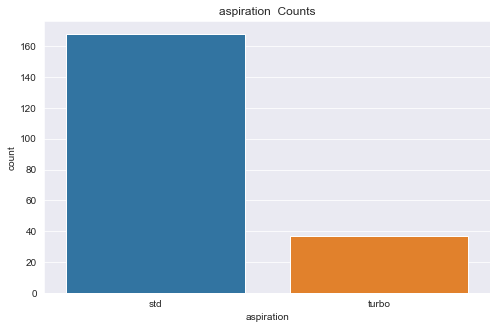

In [36]:
sns.countplot(x="aspiration", data = carData )
plt.title("aspiration  Counts")
plt.show()

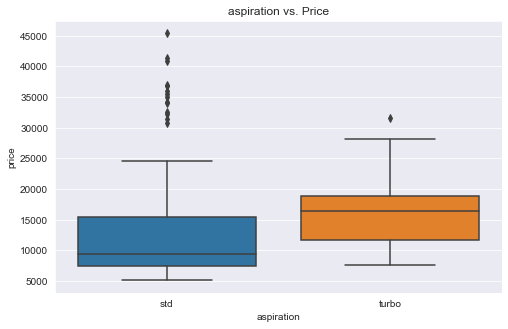

In [37]:
sns.boxplot(x="aspiration", y = "price", data = carData )
plt.title("aspiration vs. Price")
plt.show()

In [38]:
# turbos aspiration are rare and on average expensive.

C:\Users\Mamoon College\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


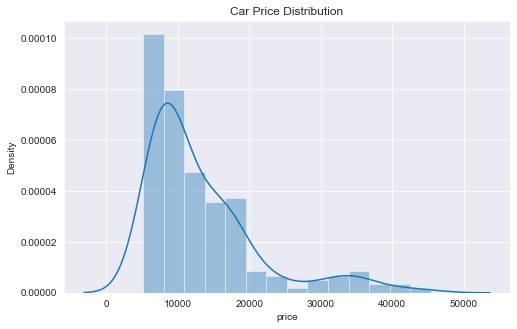

In [39]:
sns.distplot(carData["price"], kde=True)
plt.title("Car Price Distribution")
plt.show()

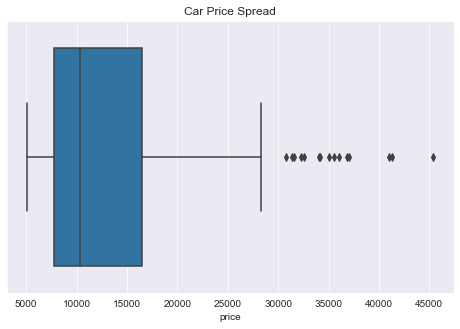

In [40]:
sns.boxplot(x=carData["price"])
plt.title("Car Price Spread")
plt.show()

In [41]:
# these graphs help us look on whats the distribution of prices and we can see mos cars are mostly aroun 6,000 to 20,000

(0.0, 40000.0)

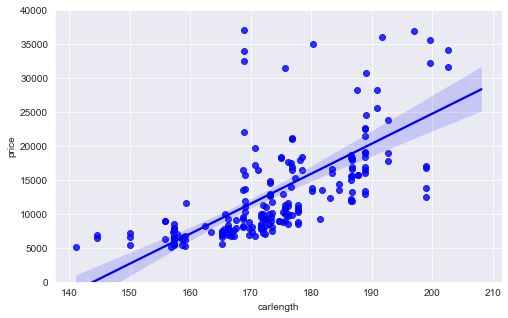

In [42]:
sns.regplot(x="carlength", y="price", data=carData,
                  color="b")
plt.ylim(0, 40000)

(0.0, 40000.0)

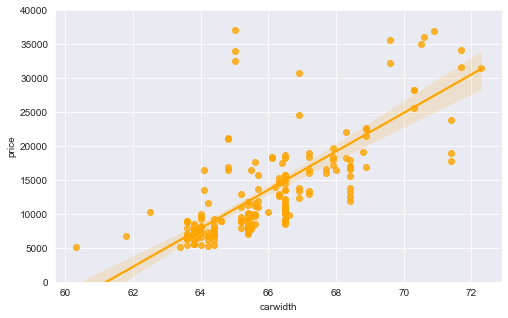

In [43]:
sns.regplot(x="carwidth", y="price", data=carData,
                  color="orange")
plt.ylim(0, 40000)

(48.0, 60.0)

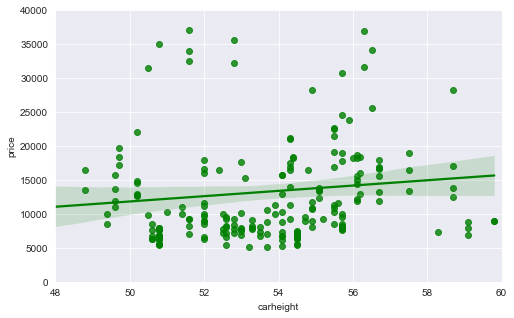

In [44]:
sns.regplot(x="carheight", y="price", data=carData,
                  color="g")
plt.ylim(0, 40000)
plt.xlim(48,60)

(0.0, 4000.0)

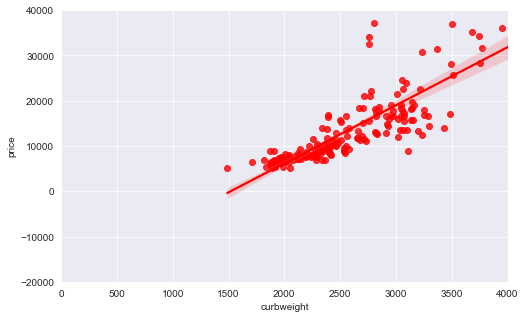

In [45]:
sns.regplot(x="curbweight", y="price", data=carData,
                  color="r",)
plt.ylim(-20000, 40000)
plt.xlim(0, 4000)

In [46]:
# these plots help us see how these numerical data can help us show how these car orientations scales the price

(0.0, 40000.0)

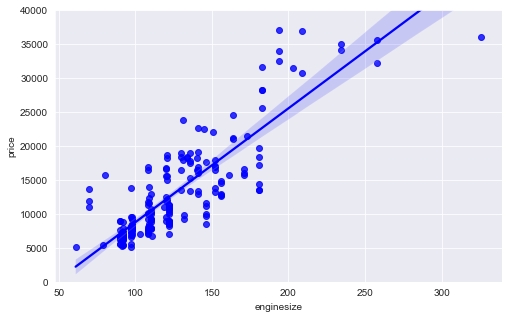

In [47]:
sns.regplot(x="enginesize", y="price", data=carData,
                  color="b")
plt.ylim(0, 40000)

(0.0, 40000.0)

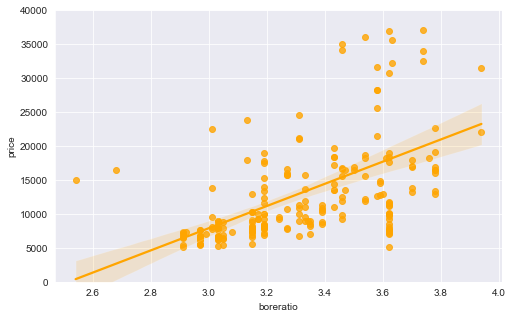

In [48]:
sns.regplot(x="boreratio", y="price", data=carData,
                  color="orange")
plt.ylim(0, 40000)

(5000.0, 45000.0)

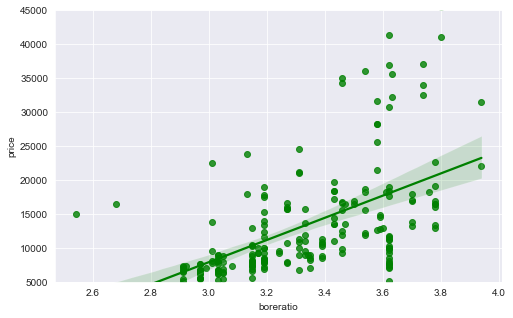

In [49]:
sns.regplot(x="boreratio", y="price", data=carData,
                  color="green")
plt.ylim(5000, 45000)

(5000.0, 45000.0)

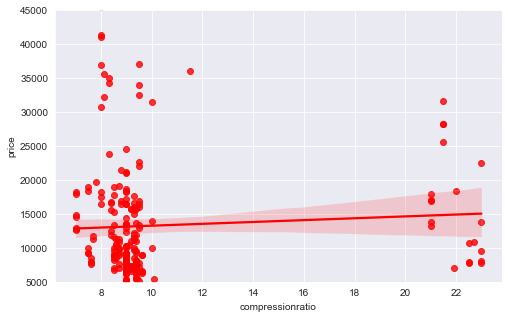

In [50]:
sns.regplot(x="compressionratio", y="price", data=carData,
                  color="r")
plt.ylim(5000, 45000)

(0.0, 50000.0)

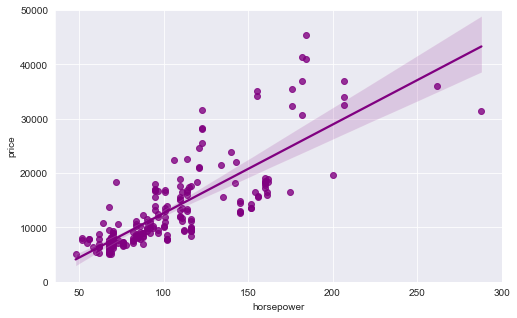

In [51]:
sns.regplot(x="horsepower", y="price", data=carData,
                  color="purple")
plt.ylim(0,50000)

(5000.0, 45000.0)

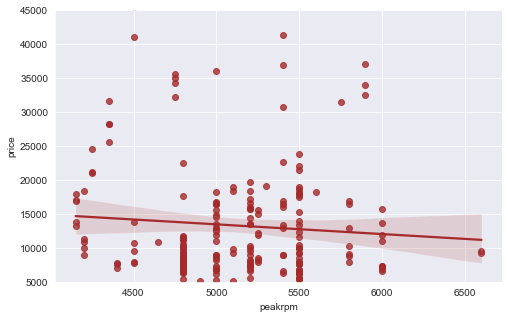

In [52]:
sns.regplot(x="peakrpm", y="price", data=carData,
                  color="brown")
plt.ylim(5000,45000)

(0.0, 40000.0)

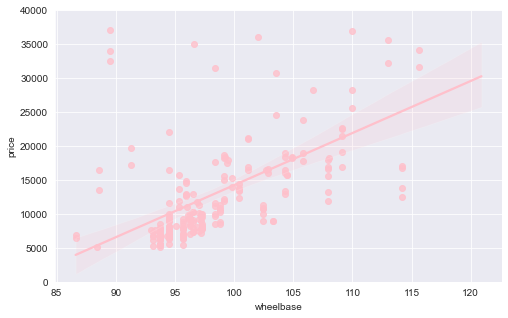

In [53]:
sns.regplot(x="wheelbase", y="price", data=carData,
                  color="pink")
plt.ylim(0,40000)

(-10000.0, 50000.0)

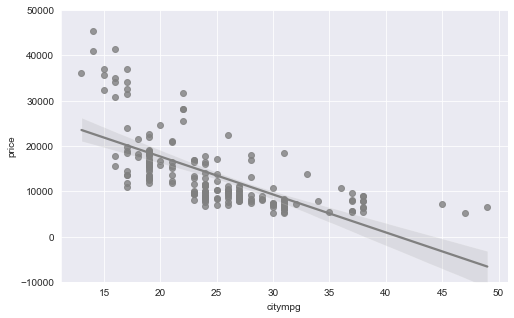

In [54]:
sns.regplot(x="citympg", y="price", data=carData,
                  color="grey")
plt.ylim(-10000,50000)

(0.0, 5000.0)

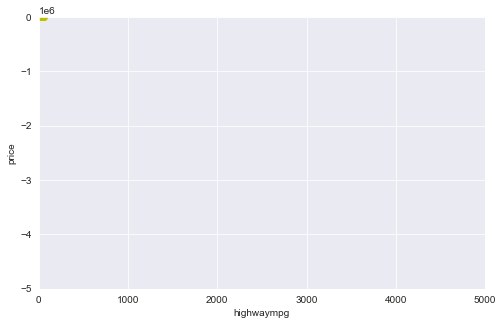

In [55]:
sns.regplot(x="highwaympg", y="price", data=carData,
                  color="y")
plt.ylim(-5000000,0)
plt.xlim(0,5000)

In [56]:
# these graph shows how certain  engine feature decrease/ increase the price of the car itself

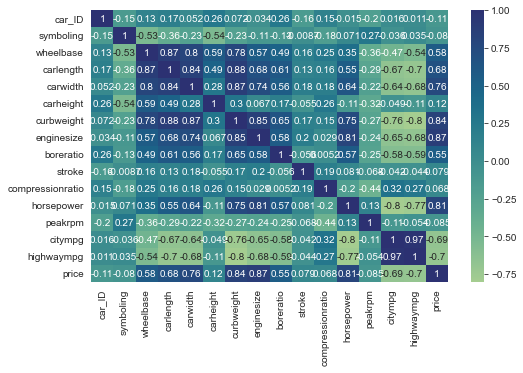

In [57]:
sns.heatmap(carData.corr(), cmap = "crest",annot = True)

plt.show()

In [58]:
# this shows the correlation between  all types of data, high correlation means maybe we should look into removig that data

In [59]:
carData["fueleconomy"] = (carData["citympg"] + carData["highwaympg"])/2
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,20.0


In [60]:
# i believe that engine size increases the price rapidly increases as the size increase

In [61]:
carData.drop("CarName", axis = 'columns' , inplace = True)
carData.drop("CompanyName", axis = 'columns' , inplace = True)
carData.drop("citympg", axis = 'columns' , inplace = True)
carData.drop("highwaympg", axis = 'columns' , inplace = True)



carData= pd.get_dummies(carData,
                     columns = [ 'fueltype', "aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"])

carData.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.preprocessing import RobustScaler
scaled_features = RobustScaler().fit_transform(carData.values)
scaled_features

array([[-1.        ,  1.        , -1.06329114, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99019608,  1.        , -1.06329114, ...,  1.        ,
         0.        ,  0.        ],
       [-0.98039216,  0.        , -0.3164557 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.98039216, -1.        ,  1.53164557, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.99019608, -1.        ,  1.53164557, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.        ,  1.53164557, ...,  1.        ,
         0.        ,  0.        ]])

In [63]:
carData = pd.DataFrame(scaled_features, index=carData.index, columns=carData.columns)
carData.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.000000,1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.227273,0.372093,-2.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.990196,1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.227273,0.372093,-2.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.980392,0.0,-0.316456,-0.119048,0.000000,-0.485714,0.517722,0.727273,-1.465116,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.970588,0.5,0.354430,0.202381,0.250000,0.057143,-0.097468,-0.250000,-0.279070,0.366667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.960784,0.5,0.303797,0.202381,0.321429,0.057143,0.518987,0.363636,-0.279070,0.366667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
y = carData['price']
Xdata = carData
Xdata.drop("price", axis='columns', inplace=True)
X = carData[Xdata.columns]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

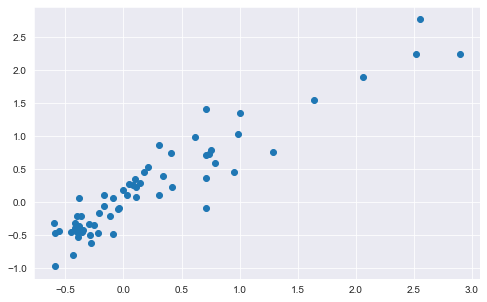

In [67]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

C:\Users\Mamoon College\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


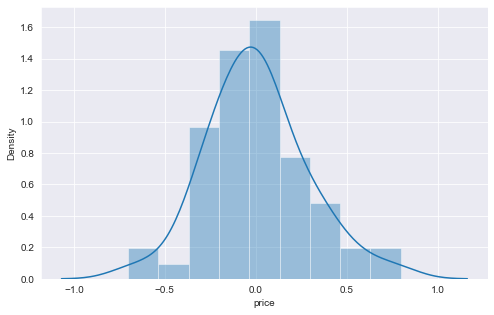

In [68]:
residuals = y_test - predictions
sns.distplot(residuals, kde=True)
plt.show()


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8750949375924891

In [70]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lm.coef_)
coef_table

,0,Coefs
0,car_ID,-0.158699
1,symboling,0.041618
2,wheelbase,0.089979
3,carlength,-0.093148
4,carwidth,0.195210
5,carheight,0.024358
6,curbweight,0.398724
7,enginesize,0.313519
8,boreratio,0.099804
9,stroke,-0.155309


In [71]:
# The coefficents help us see how much each column is helping us dictate our prediction
# Overall this data set has help me clearify how to Visuallize data and more importantly it helped
# me learn the ways to properly split and test my data.  Also the visual process was proved helpful as my 
# guess of engine price dictating cost was right as it is one of the highest coefficent.